#### Analisis de Sentimientos y procesamiento del lenguaje natural NLP


In [ ]:
import polars as pl 

reviews = pl.read_csv('film_reviews_result.csv', separator= "|", infer_schema=True)

TypeError: read_csv() got an unexpected keyword argument 'separator'

In [113]:
print(
  reviews.sample(5)
)

shape: (5, 6)
┌─────────────────┬────────────────┬───────────────┬─────────────┬────────────────┬────────────────┐
│ film_name       ┆ gender         ┆ film_avg_rate ┆ review_rate ┆ review_title   ┆ review_text    │
│ ---             ┆ ---            ┆ ---           ┆ ---         ┆ ---            ┆ ---            │
│ str             ┆ str            ┆ str           ┆ i64         ┆ str            ┆ str            │
╞═════════════════╪════════════════╪═══════════════╪═════════════╪════════════════╪════════════════╡
│ La casa de      ┆ Serie de TV,   ┆ 6,9           ┆ 4           ┆ Es un culebrón ┆ La premisa es  │
│ papel (Serie de ┆ Thriller,      ┆               ┆             ┆ más.           ┆ interesante,   │
│ TV)             ┆ Intriga…       ┆               ┆             ┆                ┆ aun…           │
│ Sex Education   ┆ Serie de TV,   ┆ 7,3           ┆ 10          ┆ Más que        ┆ Es una de las  │
│ (Serie de TV)   ┆ Comedia,       ┆               ┆             ┆ excelentes

Este dataset (corpus) contiene criticas realizadas por los usuarios de www.filmaffinity.com sobre todas las películas y series españolas (Mas de 10000 peliculas).   


El dataset (copus) esta formado por:    

film_name: Título de la película.     
gender: Genero de la película (comedia, terror, acción, etc.)         
film_avg_rate: Nota media de la película (votos de todos los usuarios)      
review_rate: Nota que el usuario que hace la crítica pone a la película.      
review_title: Título de la crítica.     
review_text: Crítica de la película     

In [114]:
#examinacion de valores nulo

print(reviews.describe())

shape: (9, 7)
┌────────────┬──────────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ statistic  ┆ film_name    ┆ gender       ┆ film_avg_ra ┆ review_rate ┆ review_titl ┆ review_text │
│ ---        ┆ ---          ┆ ---          ┆ te          ┆ ---         ┆ e           ┆ ---         │
│ str        ┆ str          ┆ str          ┆ ---         ┆ f64         ┆ ---         ┆ str         │
│            ┆              ┆              ┆ str         ┆             ┆ str         ┆             │
╞════════════╪══════════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ count      ┆ 10058        ┆ 10058        ┆ 10058       ┆ 10058.0     ┆ 10058       ┆ 10058       │
│ null_count ┆ 0            ┆ 0            ┆ 0           ┆ 0.0         ┆ 0           ┆ 0           │
│ mean       ┆ null         ┆ null         ┆ null        ┆ 5.852456    ┆ null        ┆ null        │
│ std        ┆ null         ┆ null         ┆ null        ┆ 2.407915    ┆ null

In [115]:
reviews = (
  reviews
    .with_columns(
      [
        #pasemos multiples columnas para la transformacion
        pl.col('review_rate')
        .cast(pl.Float32)
        .alias('review_rate'),
        
        pl.col('film_avg_rate')
        .str.replace(",", ".")
        .cast(pl.Float32)
        .alias('film_avg_rate')
      ]
    )
    .with_columns(
    pl.col('gender')
    .str.split(",")
    .list.get(0) #debe tener al menos 1 elemento si no tien y le pasass 2  dara error
    .alias('genero')
  )
   .with_columns(
    pl.col('review_text')
    .str.split(" ")
    .alias('tokenizacion')
  )
  .with_columns(
    pl.col('review_text')
    .str.split(" ")
    .list.len()
    .alias("conteo palabras")
  )
  .with_columns(
    pl.col('review_text')
    .str.len_chars()
    .alias("Caracteres")
  )
)

reviews.sample(5)



film_name,gender,film_avg_rate,review_rate,review_title,review_text,genero,tokenizacion,conteo palabras,Caracteres
str,str,f32,f32,str,str,str,list[str],u32,u32
"""Una imagen para creer ""","""Comedia, Romance, Comedia romá…",4.6,7.0,"""El sueño de una tarde de veran…","""Turquía sigue agrandando su in…","""Comedia""","[""Turquía"", ""sigue"", … ""Netflix.""]",288,1811
"""Rebel Moon (Capítulo uno): El …","""Ciencia ficción, Acción, Avent…",5.5,8.0,"""Festín snyderiano por todo lo …","""Aunque nada vaya a evitar el h…","""Ciencia ficción""","[""Aunque"", ""nada"", … ""Muertos"".""]",265,1559
"""El extraño ""","""Thriller, Intriga, Crimen, Pol…",6.2,7.0,"""Una nueva versión del crimen r…","""SinopsisSe forma una amistad e…","""Thriller""","[""SinopsisSe"", ""forma"", … ""bastante.""]",368,2198
"""El problema de los 3 cuerpos (…","""Serie de TV, Ciencia ficción, …",6.5,7.0,"""Mola, pero podía molar mucho m…","""Estamos ante lo de siempre: ha…","""Serie de TV""","[""Estamos"", ""ante"", … ""trisolarianos...""]",232,1332
"""Hitler y los nazis: La maldad …","""Serie de TV, Documental, Nazis…",7.0,9.0,"""HITLER - LA AMBICIÓN Y LA MALD…","""La nueva serie documental de N…","""Serie de TV""","[""La"", ""nueva"", … ""9.""]",261,1608


In [116]:
#cuanta pelicualas y comentarios se disponen

(
  reviews
  .group_by(pl.col('film_name'))
  .agg(pl.len().alias("comentarios"))
  .describe()
)

#Aproximadamente exisyte 766 pelicual registradas
#vemo cuantos comentarios disponemos

statistic,film_name,comentarios
str,str,f64
"""count""","""766""",766.0
"""null_count""","""0""",0.0
"""mean""",null,13.130548
"""std""",null,28.475857
"""min""","""(Des)encanto (Serie de TV)""",1.0
"""25%""",null,2.0
"""50%""",null,5.0
"""75%""",null,13.0
"""max""","""Ōoku: Los aposentos privados (…",339.0


In [117]:
#Cantidad de palabras utiliziadas por coemntarios
print(
  len(reviews['review_text'][0]), "caracteres",
  reviews['review_text'].str.split(" ")

)

359 caracteres shape: (10_058,)
Series: 'review_text' [list[str]]
[
	["Como", "fan", … "largo."]
	["Todo", "lo", … "baba."]
	["La", "serie", … "bazofias."]
	["Nadie", "te", … "pena."]
	["Está", "serie", … "sentido"]
	…
	["Un", "misterioso", … "secreto."]
	["Empieza", "bien,", … "sostiene."]
	["Segunda", "entrega", … "más."]
	["Con", "Old", … "apuro."]
	["Tercera", "entrega", … "torpe."]
]


Utilziaremos otro paque de python plotline ya que es la representacipon de ggplot de r en python ¡Es una excelente noticia! Para muchos analistas que vienen de R, descubrir plotnine es como volver a casa.

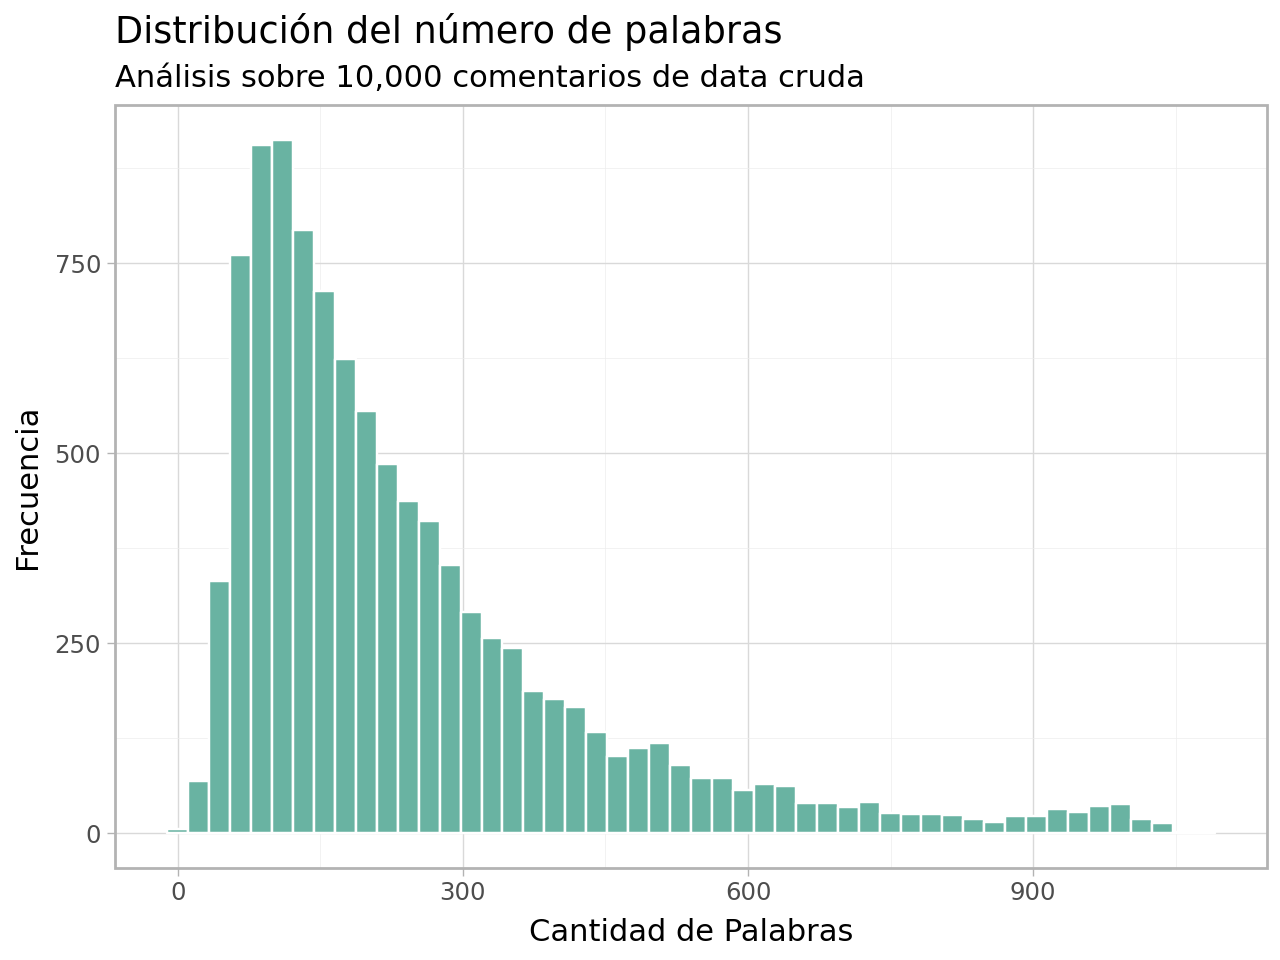

In [118]:
from plotnine import ggplot, aes, geom_histogram, labs, theme_light


# Creamos el gráfico
grafico_longitud = (
    ggplot(reviews) 
    + aes(x='conteo palabras') 
    + geom_histogram(bins=50, fill="#69b3a2", color="white")
    + labs(
        title="Distribución del número de palabras",
        subtitle="Análisis sobre 10,000 comentarios de data cruda",
        x="Cantidad de Palabras",
        y="Frecuencia"
    )
    + theme_light()
)

# Para mostrarlo
grafico_longitud

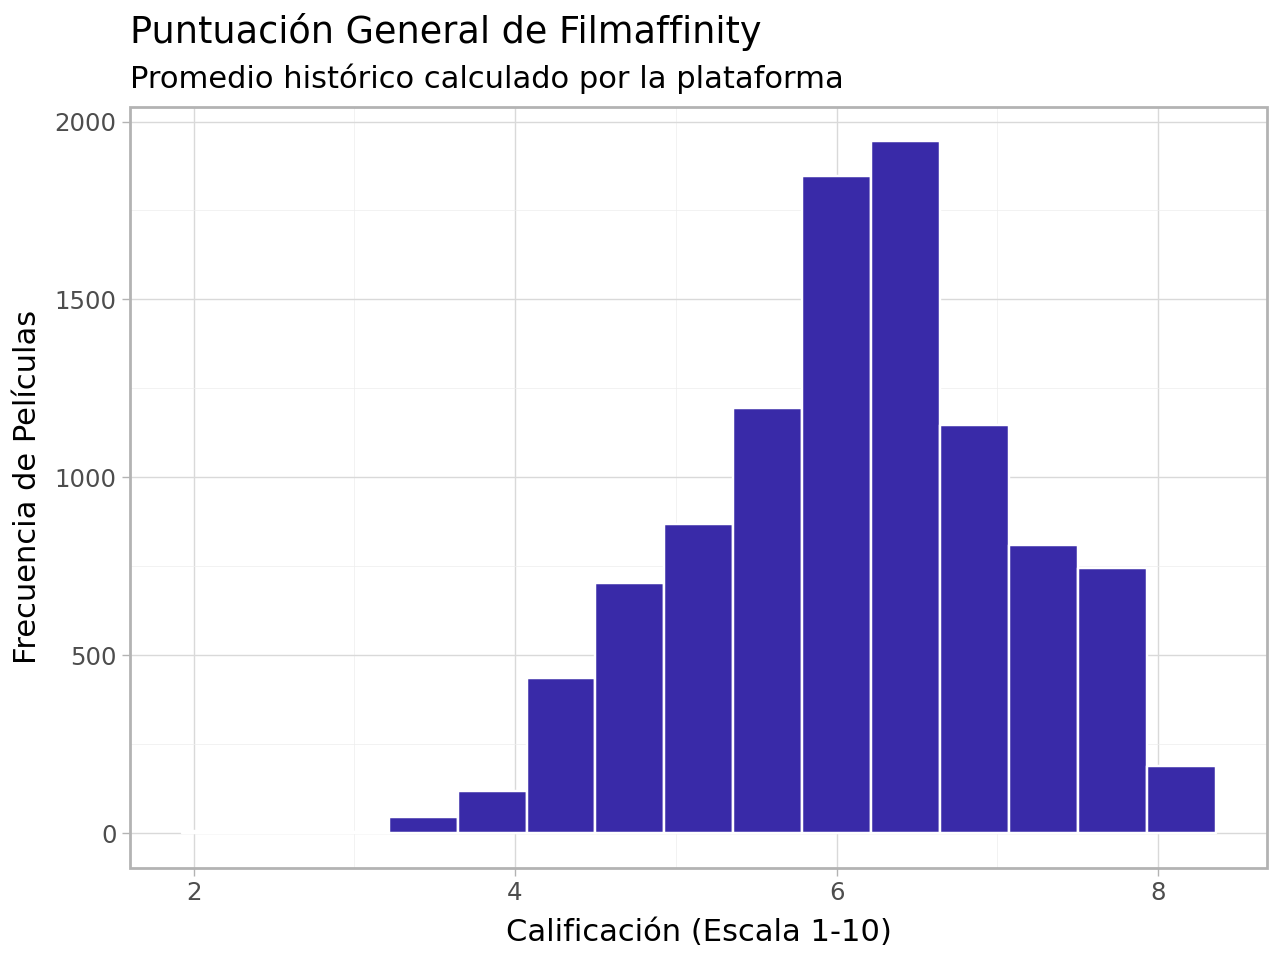

c:\Users\DELL\Python\miniconda3\envs\base2\Lib\site-packages\plotnine\layer.py:374: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


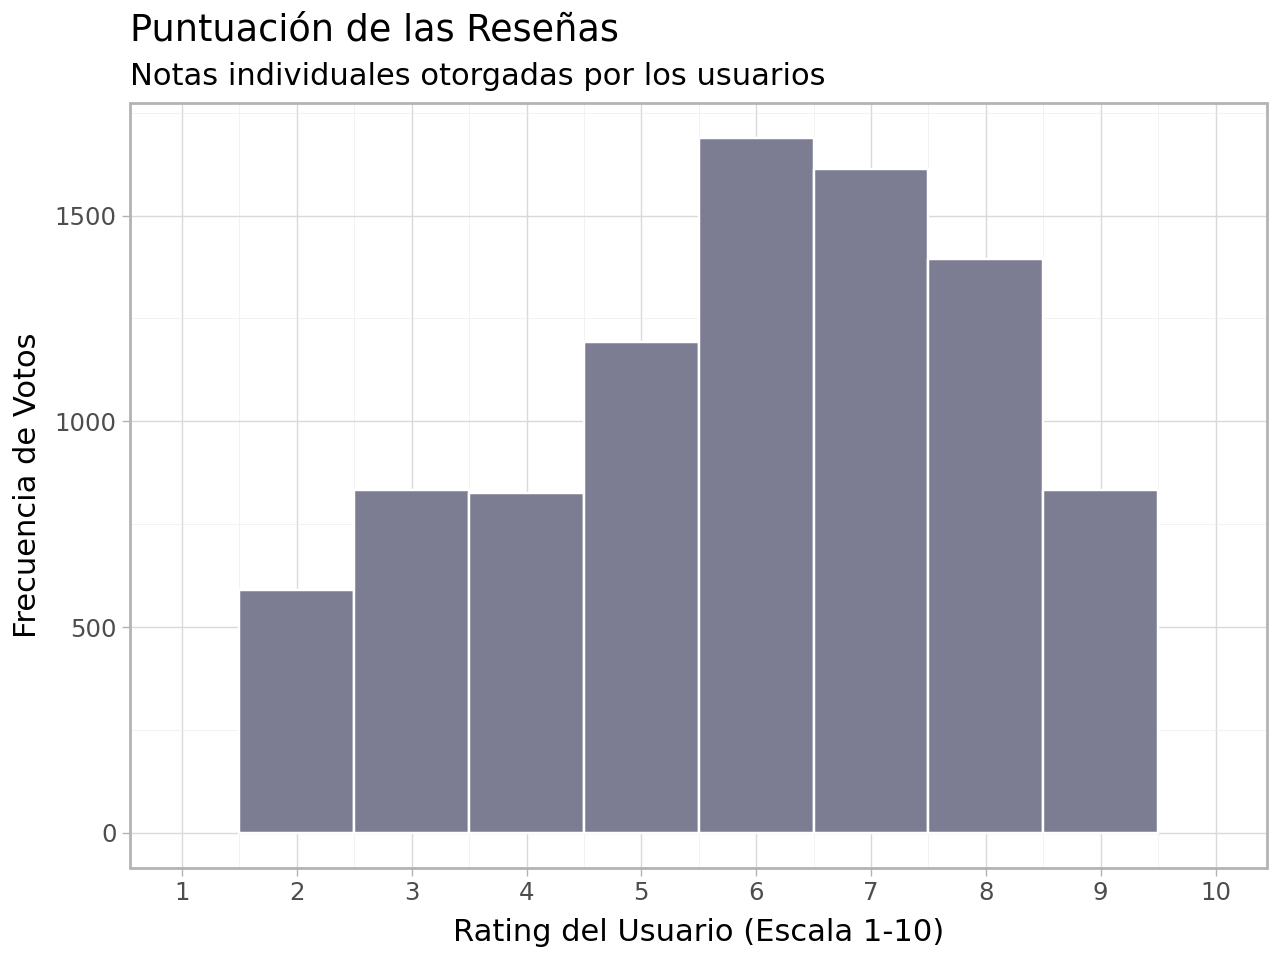

(None, None)

In [119]:
from plotnine import ggplot, aes, geom_col, labs, theme_light, coord_flip

#Gráfico de Calificación Promedio de la Película
p1 = (
    ggplot(reviews) 
    + aes(x='film_avg_rate') 
    + geom_histogram(bins=15, fill="#392aa8", color="white")
    + labs(
        title="Puntuación General de Filmaffinity",
        subtitle="Promedio histórico calculado por la plataforma",
        x="Calificación (Escala 1-10)",
        y="Frecuencia de Películas"
    )
    + theme_light()
)

# Gráfico de Puntuación del Usuario
p2 = (
    ggplot(reviews) 
    + aes(x='review_rate') 
    + geom_histogram(bins=10, fill="#7C7C93", color="white")
    + scale_x_continuous(limits=(1, 10), breaks=range(1, 11)) # Eje de 1 a 10
    + labs(
        title="Puntuación de las Reseñas",
        subtitle="Notas individuales otorgadas por los usuarios",
        x="Rating del Usuario (Escala 1-10)",
        y="Frecuencia de Votos"
    )
    + theme_light()
)

# 3. Unir los gráficos lado a lado sin usar los "ax" de Matplotlib (Evita el TypeError)
p1.show(), p2.show()

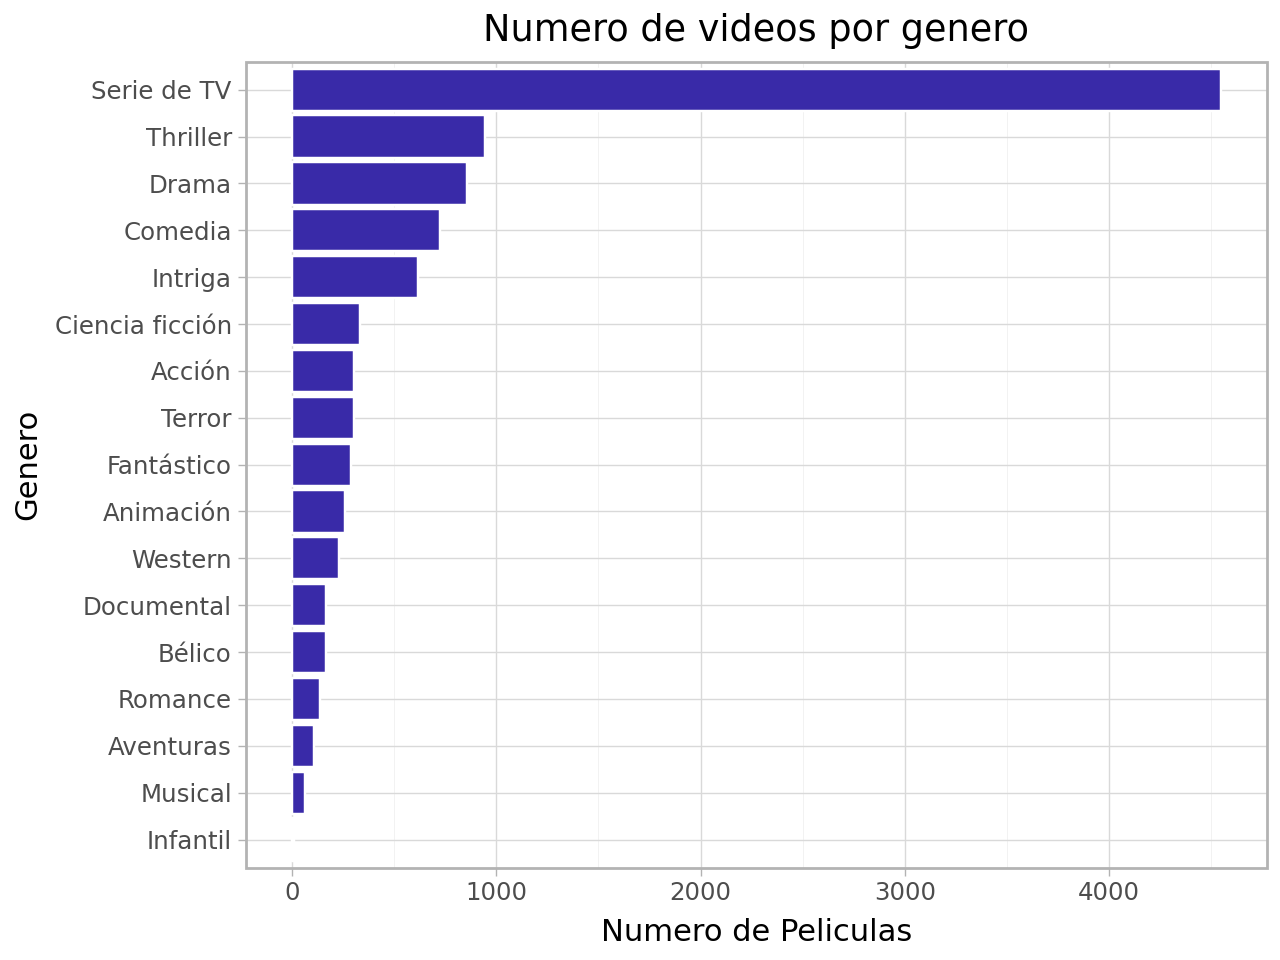

genero,total_peliculas
str,u32
"""Serie de TV""",4546
"""Thriller""",946
"""Drama""",857
"""Comedia""",722
"""Intriga""",619
…,…
"""Bélico""",165
"""Romance""",138
"""Aventuras""",108


In [120]:
from plotnine import ggplot, aes, geom_col, labs, theme_light, coord_flip
generos = (
  reviews
  .group_by("genero")
  .agg(
     pl.len().alias("total_peliculas")
  )
  .sort('total_peliculas', descending=True)
)

generos

p1 = (
    ggplot(generos.to_pandas())  # plotnine trabaja mejor con pandas
    + aes(x='reorder(genero, total_peliculas)', y='total_peliculas') #ordenamos el eje
    + geom_col(fill="#392aa8", color="white")
    + labs(
        title="Numero de videos por genero",
        x="Genero",
        y="Numero de Peliculas"
    )
    + theme_light()
    + coord_flip()  # opcional: mejora la lectura
)

p1.show()
generos